<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/03_Convolutional_Neural_Network_(CNN)_With_Tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 CNN & Computer Vision with Tensorflow
___

CNN is a special kind of neural network and could be used for computer vision. Simplifying Computer Vision Problem :
 - Detecting patterns in visual data (image , video)
 - Classification of visual data (image , video)
 - Object detection

For example : camera of a self driving car recognising the object in its path

**Components of a convolutional neural network:**

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*
<br> **Source : ZTM TensorFlow Developer Certificate in 2021**

**Recap of the hidden activation layer**
___

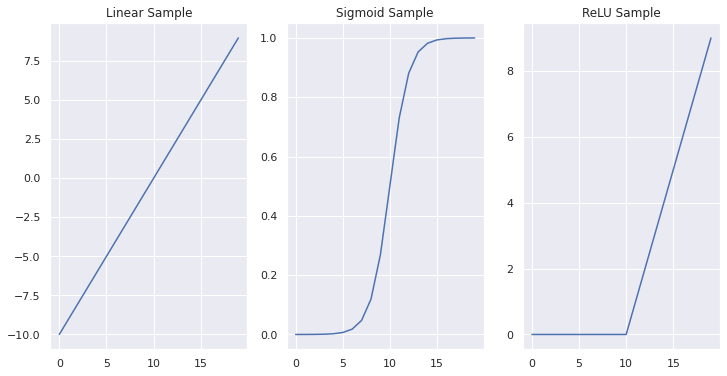

In [155]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Passing a linear range
sample_linear = tf.range(-10,10 , dtype = tf.float32)

# 
def sigmoid(x):
  return 1/(1+tf.exp(-x))

def relu(x):
  return tf.maximum(0 , x)

# Passing linear range via the sigmoid and relu function
sample_sigmoid = sigmoid(sample_linear)
sample_relu = relu(sample_linear)

plt.figure(figsize = (12 , 6))

# Linear Activation - Same as Linear line
plt.subplot(1,3,1)
plt.plot(sample_linear)
plt.title('Linear Sample')

# Sigmoid Activation
plt.subplot(1,3,2)
plt.plot(sample_sigmoid)
plt.title('Sigmoid Sample')

# ReLU Activation
plt.subplot(1,3,3)
plt.plot(sample_relu)
plt.title('ReLU Sample');


In [156]:
# Import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
!nvidia-smi

2.6.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Sun Aug 22 14:18:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    25W /  75W |   1939MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
               

In [157]:
# Import libraries

import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')
sns.set()

# 1.0 Getting data from food101 (kaggle)
___

In [158]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-22 14:18:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 173.194.195.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   193MB/s    in 0.5s    

2021-08-22 14:18:04 (193 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



In [159]:
# Unzip the file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [160]:
# Checking file directory in dataset
!ls pizza_steak
!ls pizza_steak/train
# !ls pizza_steak/train/steak

test  train
pizza  steak


In [161]:
for dirpath , dirnames , filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}')

There are 2 directories, 1 images in pizza_steak
There are 2 directories, 1 images in pizza_steak/test
There are 0 directories, 250 images in pizza_steak/test/pizza
There are 0 directories, 250 images in pizza_steak/test/steak
There are 2 directories, 1 images in pizza_steak/train
There are 0 directories, 750 images in pizza_steak/train/pizza
There are 0 directories, 750 images in pizza_steak/train/steak


In [162]:
print(f'No. of Image file in pizza_steak/train/steak : {len(os.listdir("pizza_steak/train/steak"))}')
print(f'No. of Image file in pizza_steak/test/steak : {len(os.listdir("pizza_steak/test/steak"))}')

No. of Image file in pizza_steak/train/steak : 750
No. of Image file in pizza_steak/test/steak : 250


In [163]:
# Extra image file in pizza_steak is in .DS_Store
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 22 14:15 .
drwxr-xr-x 1 root root 4096 Aug 22 14:18 ..
-rw-r--r-- 1 root root 6148 Aug 22 14:18 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 22 14:15 test
drwxr-xr-x 4 root root 4096 Aug 22 14:15 train


### 1.1 Setting Up File Path
___

In [164]:
# Setting up pathlib to get the file directory

"""
Pathlib module are divided into pure paths and concrete paths. 
Pure paths provides only computational operations but does not provides I/O operations, 
while concrete paths inherit from pure paths provides computational as well as I/O operations.
PosixPath is a subclass of pathlib.Path and pathlib.PurePosixPath class. This class represents the concrete non-Windows file system paths.
"""
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [165]:
"""
Path.glob(pattern):
Glob the given relative pattern in the directory represented by this path, yielding all matching files (of any kind)
"""
for item in data_dir.glob('*'):
  print(item.name)

pizza
steak
.DS_Store


In [166]:
class_names = [item.name for item in data_dir.glob('*')][:2]
class_names

['pizza', 'steak']

### 1.2 Visualising Data
___


In [167]:
def view_random_image(target_dir , target_class):
  #Define folder directory - steak or pizza
  target_folder = target_dir + '/' + target_class

  # Sample 1 random image from file path
  random_image = random.sample(os.listdir(target_folder) , 1)
  # print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(f'{target_class} , {img.shape}')
  plt.axis('off');

  plt.xlabel(f'image shape: {img.shape}')

  return img

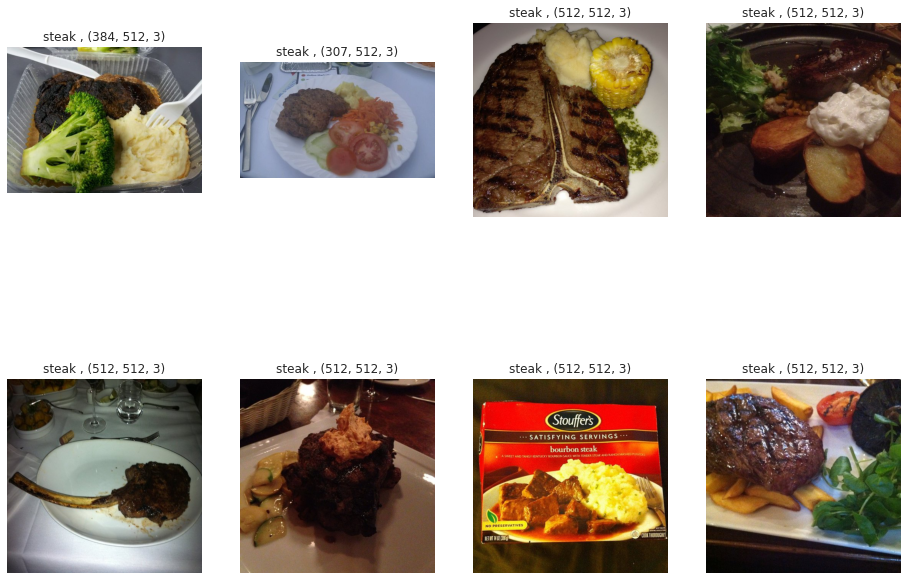

In [168]:
plt.figure(figsize = (16,12))
for i in range(8):
  plt.subplot(2,4,i+1)
  img = view_random_image(target_dir = 'pizza_steak/train', 
                        target_class = 'steak')

In [169]:
# Image Shape

"""
1. Neural Network work with value between 0 and 1
2. Common preprocessing involve scaling or normalizing pixbel value by dividing pixel array by the maximum pixel value
"""

img.shape # return width , height and color channels

(512, 512, 3)

# 2.0 Comparing CNN with Neural Network
___

Steps to building the CNN model:
1. Define Rescale Function and file dir
2. Load and Preprocess images
3. Build a CNN model to find pattern in images 
4. Compile the CNN model
5. Fit the CNN model


In [170]:
tf.random.set_seed(42)

# Step 0 : Preprocesing data
train_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

# Setup path directory to stored image location
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Load data from file directory
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                            batch_size = 32,
                                            target_size = (224 , 224),
                                            class_mode = 'binary',
                                            seed = 42) #Take the path to a directory & generate batches of augmented data
                                            
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = 'binary',
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [171]:
# Step 1 : Build a model (Base on Tiny VGG on CNN explainer website)

"""
1. filters: Int, the dimensionality of the output space
2. kernel : An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
"""
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters = 10,   
                                                             kernel_size = 3,
                                                             activation  = 'relu',
                                                             input_shape = (224 , 224 , 3)),
                                      tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(pool_size = 2,
                                                                padding = 'valid'),
                                      tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
                                      tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1 , activation  = 'sigmoid')
])

# Step 2 : Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model
history_1 = model_1.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data)) # batch size of 32. Total data size is 1500. Therefore len(data) = 1500/32

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.6166 - binary_accuracy: 0.6567 - val_loss: 0.3966 - val_binary_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4308 - binary_accuracy: 0.8127 - val_loss: 0.3293 - val_binary_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4293 - binary_accuracy: 0.8047 - val_loss: 0.3386 - val_binary_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3780 - binary_accuracy: 0.8373 - val_loss: 0.3120 - val_binary_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3293 - binary_accuracy: 0.8727 - val_loss: 0.3165 - val_binary_accuracy: 0.8560


In [172]:
# Model Summary
# Refer to CNN Explainer Website : poloclub.github.io/cnn-explainer/
model_1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 28090)           

### 2.1 Experimenting with Neural Network with 20x more trainable params than CNN.
___
- [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.49108&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

- model 2 has more trainable params , but it performed more badly than CNN.
- model 2 is actually just guessing base on accuracy of 0.5.



In [173]:
tf.random.set_seed(42)

# Step 1 : Create a model
model_2  = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (224, 224 ,3)),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Step 2 : Compile the model
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model
history_2 = model_2.fit(train_data,
                        validation_data = valid_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.9515 - binary_accuracy: 0.5087 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6933 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000


In [174]:
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### 2.2 Experimenting with Neural Network with Neural Network with 500x more trainable params than CNN.
___

- Accuracy not as good as CNN even having more params.

In [175]:
tf.random.set_seed(42)

# Step 1 : Create a model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224 , 224 , 3)),
                               tf.keras.layers.Dense(100 , activation  = 'relu'),
                               tf.keras.layers.Dense(100 , activation  = 'relu'),
                               tf.keras.layers.Dense(100 , activation = 'relu'),
                               tf.keras.layers.Dense(1 , activation  = 'sigmoid')
])

# Step 2 : Compile the model
model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        validation_data = valid_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 3.2484 - binary_accuracy: 0.6460 - val_loss: 0.5335 - val_binary_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 1.1825 - binary_accuracy: 0.6980 - val_loss: 1.6112 - val_binary_accuracy: 0.6300
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.8363 - binary_accuracy: 0.7093 - val_loss: 1.7244 - val_binary_accuracy: 0.5580
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5748 - binary_accuracy: 0.7627 - val_loss: 0.4410 - val_binary_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4632 - binary_accuracy: 0.7893 - val_loss: 0.4196 - val_binary_accuracy: 0.7920


In [176]:
model_3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 150528)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### 3.0 End to End CNN Example

1. Load images
2. Preprocess images
3. Build a CNN model to find pattern in images 
4. Compile the CNN model
5. Fit the CNN model

In [177]:
# Step 0 : Preprocessing Images

# Rescaling
train_datagen = ImageDataGenerator(rescale = 1/255.0)
test_datagen = ImageDataGenerator(rescale = 1/255.0)

# Defining path directory
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Load data from directories
# A batch is a small subset of data , typically optimized at 32. (Yang LeCun)
# Large images (like ~10,000) might not be able to fit into the memory of a GPU
# Trying to learn the patterns in 10,000 at one time could result model not being able to learn very well

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [178]:
# Checking the train data batches
images , labels = train_data.next() # get the next batch of images/labels in train_data
print(len(images) , len(labels)) # No. of images and labels per batch
print(len(train_data)) # total no. of batches from original dataset of 1500.
print(images[2].shape)

32 32
47
(224, 224, 3)


# 3.0 Create a new CNN Model
___

In [179]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D , Activation
from tensorflow.keras import Sequential

|Hyperparameter Name|Description|Typical Values|
|---|---|---|
|Filter|How many filters should pass over an input tensors|10,32,64,128 (higher value , more complex|
|Kernel Size(filter size)| Shape of the filter over the output| 3,5,7, lower value = smaller features. Higher value = larger features|
|Padding|Pad the target sensor with 0s at the border(if 'same') to preserve input shape. Or leaves in the target sensor(if 'valid') , lowering output shape|'same or 'valid'|
|Strides| No. of steps a filter takes across an image at a time(if stride = 1 , a filter moves across an image 1 pixel at a time| 1(default) ,2|

In [180]:
# Creating the baseline model for Convolutional Neural Network
model_4  = Sequential([
                       Conv2D(filters = 10, # number of sliding window across input
                              kernel_size = 3, #size of the sliding window
                              strides = 1, # step of the sliding window
                              padding = 'same', # if same , will create imaginery outer padding to make input same as output
                              activation = 'relu',
                              input_shape = (224,224,3)), # input layer
                       Conv2D(10, 3 , activation  = 'relu'),
                       Conv2D(10, 3 , activation = 'relu'),
                       Flatten(),
                       Dense(1 , activation = 'sigmoid') # output layer = 1 output for binary classification
])

model_4.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])


# model_4 - If the padding is active , it is observed the output shape will be different from the input shape which is 224 ,224.
# The output shape get smaller as it passes through the layer.
model_4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 224, 224, 10)      280       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 222, 222, 10)      910       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
flatten_20 (Flatten)         (None, 484000)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 484001    
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


In [181]:
len(train_data) , len(test_data)

(47, 16)

In [182]:
# Fitting model 4
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 1.0818 - accuracy: 0.6573 - val_loss: 0.4209 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4268 - accuracy: 0.8100 - val_loss: 0.3610 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3374 - accuracy: 0.8573 - val_loss: 0.4600 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.1898 - accuracy: 0.9307 - val_loss: 0.4013 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.0571 - accuracy: 0.9873 - val_loss: 0.4929 - val_accuracy: 0.8320


### 3.1 Evaluating Training Curve
___

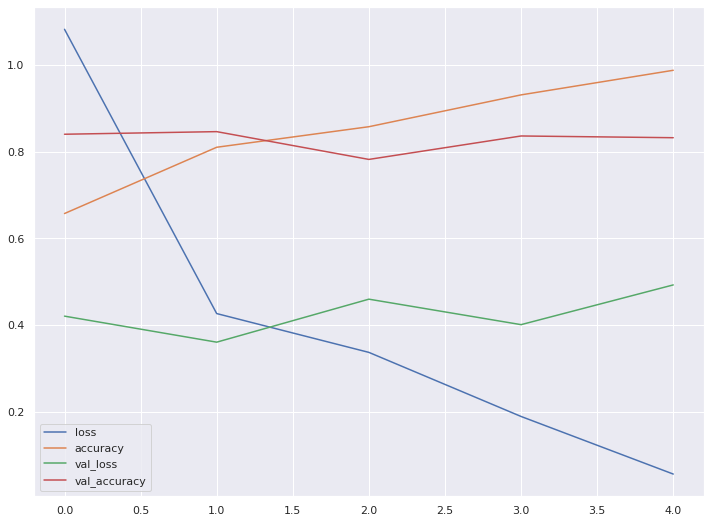

In [183]:
# Evaluating Model Training Curve
pd.DataFrame(history_4.history).plot(figsize = (12,9));

In [184]:
def plot_loss(history):
  """
  Return seperate loss curves for train and validation
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['val_loss'])) # count the number of epoch for any randomly selected variables

  # Plot loss
  plt.figure(figsize = (12,8))
  plt.subplot(1,2,1)
  plt.plot(epochs , loss , label = 'training loss')
  plt.plot(epochs , val_loss , label = 'validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot Accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs , accuracy , label = 'training accuracy')
  plt.plot(epochs , val_accuracy , label = 'validation accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()


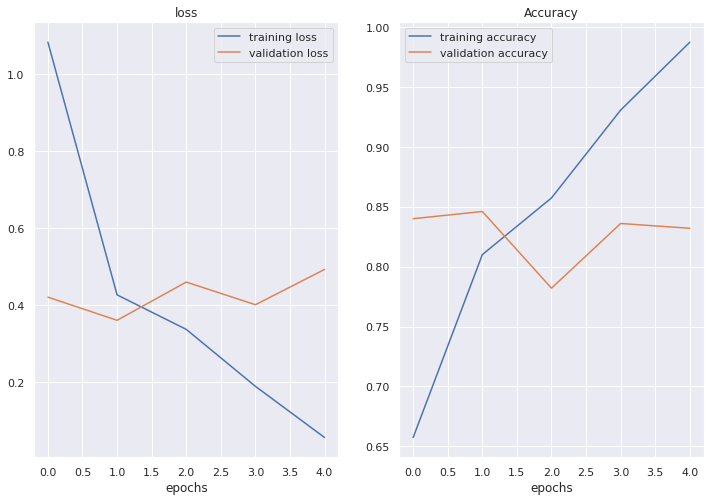

In [185]:
plot_loss(history_4)

### 3.2 Tuning Model Parameter to reduce overfitting
___

0. Create Base Model
1. Beat the Baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting
* Increase number of conv layers
* Increase number of conv filters
* Add dense layers to output to our flattened layers

Reduce Overfitting
* Add data augmentation
* Add regularisation layers (MaxPool2D)
* Add more data

|Method to improve a model|What does it do?|
|---|---|
|More data| Gives a model more of a chance to learn patterns between samples|
|Data Augmentation| Increase the variety of training set by altering the image without collecting more data|
|Better Data| Remove poor sample or add better sample to dataset|
|Transfer Learning|Take a model pre-learned pattern from 1 problem , tweak them to suit our problem. E.g. Use a model trained on caras to recgonise trucks|

In [186]:
model_5 = Sequential([
                      Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu' , input_shape=(224,224,3)),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10 , 3 , activation = 'relu'),
                      MaxPool2D(2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

model_5.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = 'accuracy')

In [187]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6050 - accuracy: 0.6607 - val_loss: 0.4653 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4708 - accuracy: 0.7807 - val_loss: 0.3876 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4347 - accuracy: 0.8040 - val_loss: 0.3539 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3912 - accuracy: 0.8333 - val_loss: 0.3565 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3775 - accuracy: 0.8367 - val_loss: 0.3854 - val_accuracy: 0.8140


In [188]:
# For each MaxPool2D layer , because our model kernel size is (2,2), it halves the shape everytime it the previous steps passes through the maxpool.
# It is also observed that despite the lesser trainable params , model_5 outperform model_4 in term of the model validation accuracy.
model_5.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 6760)            

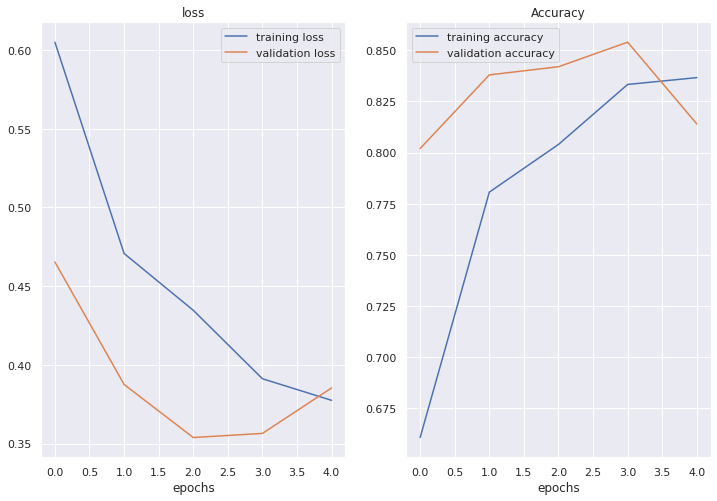

In [189]:
plot_loss(history_5)

### 3.3 Data Augmentation
___

Data augmentation is the process of altering our **training data** , leading it to mroe diversity , variety and in turn allowing our models to learn more patterns. Altering means that we could adjust , flip , crop , etc an image.

In [190]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255,
                                          rotation_range = 0.3,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.3,
                                          horizontal_flip = True)

# Calling back our previous non-augmented train and test set

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [191]:
# Augmented Train Data
print('Augmented Train Data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False) # Demostration Purpose to override Default True

# Non- Augmented Train Data
print('Non Augmented Train Data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)

# Non Augmented Test Data
print('Non Augmented Test Data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary')                             

Augmented Train Data:
Found 1500 images belonging to 2 classes.
Non Augmented Train Data:
Found 1500 images belonging to 2 classes.
Non Augmented Test Data:
Found 500 images belonging to 2 classes.


In [192]:
# Visualing data batches
# Labels are not augmented, only images
images , label = train_data.next()
aug_images , aug_labels = train_data_augmented.next()

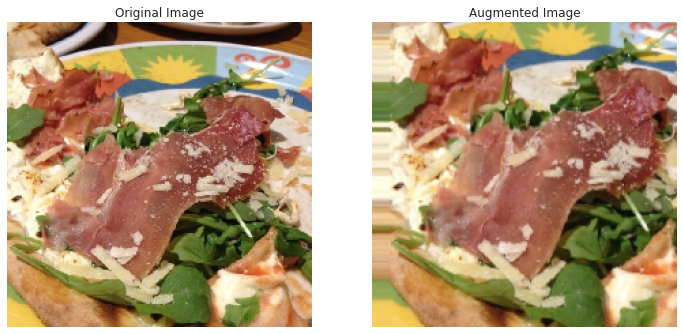

In [193]:
random_num = random.randint(0,32) # Batch size is 32
plt.figure(figsize = (12,9))

# Non-augmented Data
plt.subplot(1,2,1)
plt.imshow(images[random_num])
plt.title('Original Image')
plt.axis(False)

#Augmented Data
plt.subplot(1,2,2)
plt.imshow(aug_images[random_num])
plt.title('Augmented Image')
plt.axis(False);

### 3.4 Creating a Augmented Data Model (Not Shuffled)
___

In [194]:
# Re-Cap Model_5 model
model_5.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 6760)            

In [195]:
model_6 = Sequential([
                      Conv2D(filters = 10, kernel_size= 3 , activation = 'relu' , input_shape = (224,224,3)),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10 , 3 , activation = 'relu'),
                      MaxPool2D(2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1 , activation = 'sigmoid')
])

model_6.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = 'accuracy')


In [196]:
# Per epoch take longer : It load in images and does the data augmentation on the fly since it does not create new image file
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data_augmented),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.7567 - accuracy: 0.5160 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.7031 - accuracy: 0.4393 - val_loss: 0.6773 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6850 - accuracy: 0.5893 - val_loss: 0.6459 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6435 - accuracy: 0.6720 - val_loss: 0.5992 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6611 - accuracy: 0.6533 - val_loss: 0.6351 - val_accuracy: 0.5940


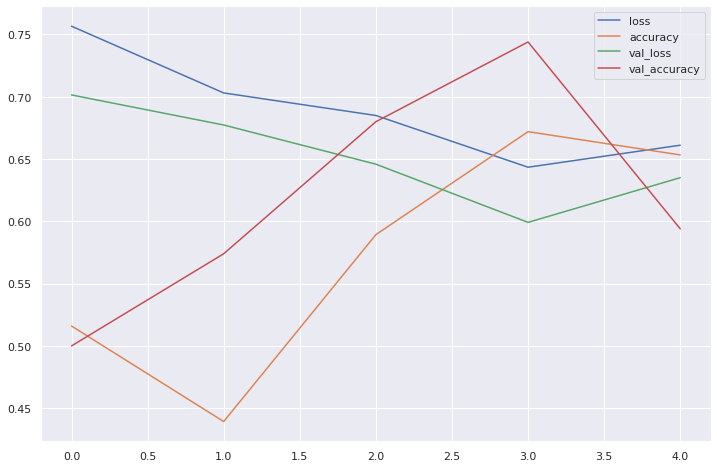

In [197]:
pd.DataFrame(history_6.history).plot(figsize = (12,8))

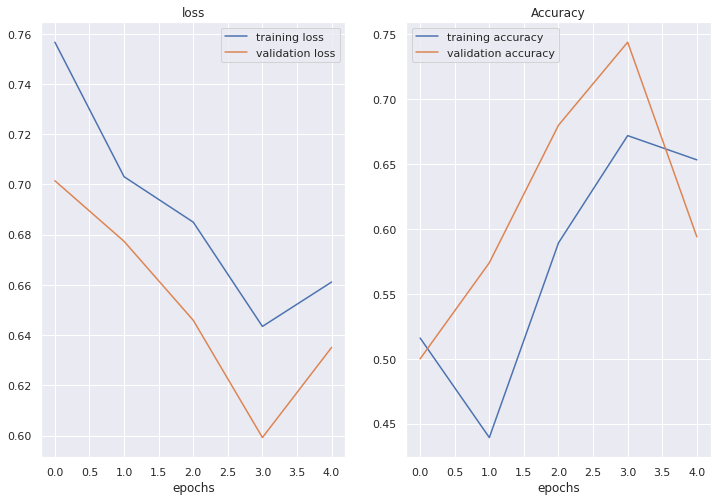

In [198]:
# Model appear to start to overfit towards the later epochs
plot_loss(history_6)

### 3.5 Creating an Augmented Data Model (Shuffled)
___

In [199]:
train_data_augmented_shuffled  = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size = (224,224),
                                                                             class_mode = 'binary',
                                                                             batch_size = 32,
                                                                             shuffle = True)

Found 1500 images belonging to 2 classes.


In [200]:
# Per epoch take longer : It load in images and does the data augmentation on the fly since it does not create new image file
model_7 = Sequential([
                      Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu' , input_shape = (224,224,3)),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10,3,activation = 'relu'),
                      MaxPool2D(2),
                      Conv2D(10,3, activation  = 'relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(1 , activation = 'sigmoid')
])

model_7.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = 'accuracy')

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6567 - accuracy: 0.6067 - val_loss: 0.5390 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5333 - accuracy: 0.7340 - val_loss: 0.3791 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5124 - accuracy: 0.7553 - val_loss: 0.4035 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4887 - accuracy: 0.7733 - val_loss: 0.3742 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4869 - accuracy: 0.7667 - val_loss: 0.3968 - val_accuracy: 0.8180


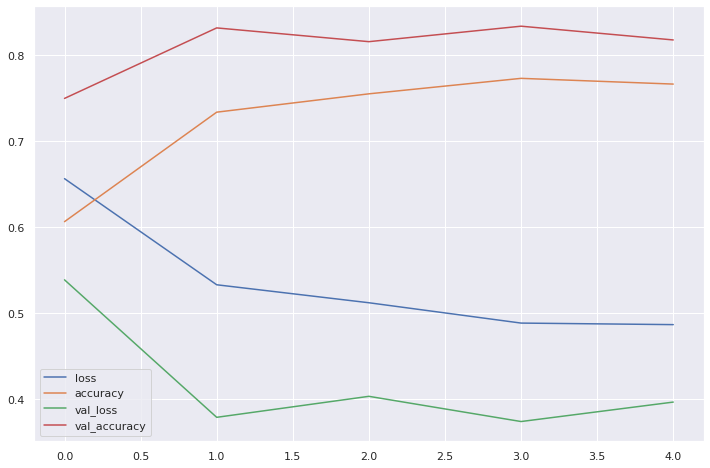

In [201]:
pd.DataFrame(history_7.history).plot(figsize = (12,8))

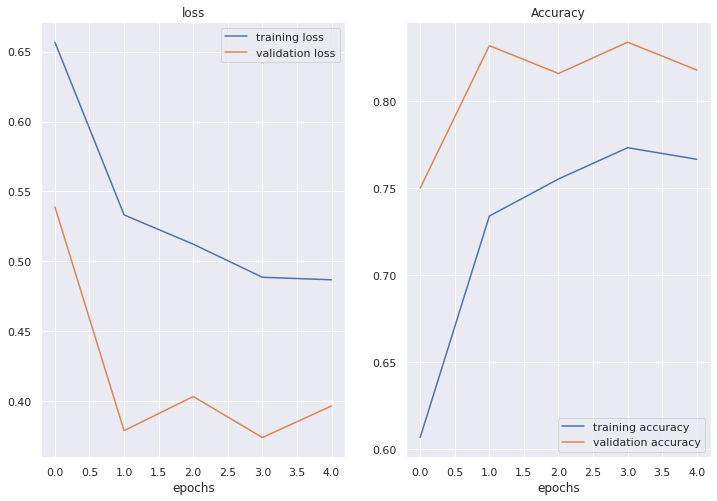

In [202]:
# Model is not overfitting for this run
plot_loss(history_7)

# 4.0 Using our model for Prediction on custom data
___

--2021-08-22 14:25:35--  https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-steak_2.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244664 (239K) [image/jpeg]
Saving to: ‘03-steak_2.jpeg.1’

03-steak_2.jpeg.1   100%[===================>] 238.93K  --.-KB/s    in 0.03s   

2021-08-22 14:25:35 (8.18 MB/s) - ‘03-steak_2.jpeg.1’ saved [244664/244664]



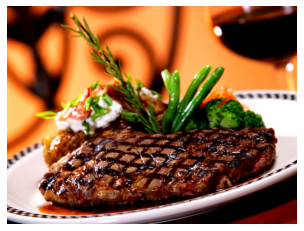

In [203]:
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-steak_2.jpeg
steak = mpimg.imread("/content/03-steak_2.jpeg")

plt.imshow(steak)
plt.axis(False);

In [204]:
# Custom Image not the same size as required input shape
steak.shape

(1200, 1600, 3)

In [205]:
# Writing a function to preprocess image
def preprocess_image(filename , img_shape = 224):

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img , [img_shape , img_shape])
  # Rescale the image
  img = img/255

  return(img)

In [206]:
steak = preprocess_image('03-steak_2.jpeg')

In [207]:
# Return in array. Need to correlate with actual image or label
pred = model_7.predict(tf.expand_dims(steak , axis = 0))
pred

array([[0.9966702]], dtype=float32)

In [208]:
print(class_names[int(tf.round(pred))])
pred_label = class_names[int(tf.round(pred))]
pred_label

steak


'steak'

In [211]:
def pred_plot(model , filename):

  # Load in Image and Preprocess
  img = preprocess_image(filename)

  # Making a prediction
  pred = model.predict(tf.expand_dims(img , axis = 0)) 

  # Getting the prediction label
  pred_label = class_names[int(tf.round(pred))]

  plt.imshow(img) # Need to remain ndim = 3 for plotting purpose --> refer to expand_dims
  plt.title(f'Prediction: {pred_label}')
  plt.axis(False)

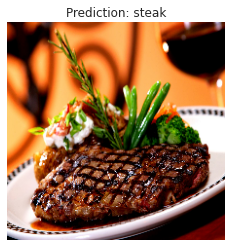

In [212]:
pred_plot(model_7 , '03-steak_2.jpeg')

### 4.1 Using our model for prediction on other images
___

--2021-08-22 14:25:54--  https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-Pizza.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568185 (555K) [image/jpeg]
Saving to: ‘03-Pizza.jpg’

03-Pizza.jpg        100%[===================>] 554.87K  --.-KB/s    in 0.04s   

2021-08-22 14:25:55 (12.7 MB/s) - ‘03-Pizza.jpg’ saved [568185/568185]



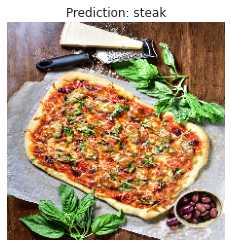

In [213]:
# Did not rightly predict this is a pizza
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-Pizza.jpg
pred_plot(model_7 , '03-Pizza.jpg' )

--2021-08-22 14:25:55--  https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-08-22 14:25:55 (41.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



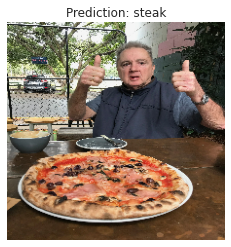

In [214]:
# Import Data
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-pizza-dad.jpeg
pred_plot(model_7 , '03-pizza-dad.jpeg' )

# 5.0 Multi Class Image Classification (End to End)
___

In [215]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D
from tensorflow.keras import Sequential

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import os
import pathlib
import zipfile

### 5.1.1 Setting Up File Path
___

In [216]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip' , mode = 'r')
zip_ref.extractall()
zip_ref.close()

--2021-08-22 14:25:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   194MB/s    in 2.6s    

2021-08-22 14:25:59 (194 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [217]:
# os.walk through the file directory
for dirpath , dirnames , filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(filenames)} files and {len(dirnames)} in {dirpath}')

There are 0 files and 2 in 10_food_classes_all_data
There are 0 files and 10 in 10_food_classes_all_data/test
There are 250 files and 0 in 10_food_classes_all_data/test/ice_cream
There are 250 files and 0 in 10_food_classes_all_data/test/fried_rice
There are 250 files and 0 in 10_food_classes_all_data/test/hamburger
There are 250 files and 0 in 10_food_classes_all_data/test/pizza
There are 250 files and 0 in 10_food_classes_all_data/test/sushi
There are 250 files and 0 in 10_food_classes_all_data/test/grilled_salmon
There are 250 files and 0 in 10_food_classes_all_data/test/chicken_wings
There are 250 files and 0 in 10_food_classes_all_data/test/ramen
There are 250 files and 0 in 10_food_classes_all_data/test/steak
There are 250 files and 0 in 10_food_classes_all_data/test/chicken_curry
There are 0 files and 10 in 10_food_classes_all_data/train
There are 750 files and 0 in 10_food_classes_all_data/train/ice_cream
There are 750 files and 0 in 10_food_classes_all_data/train/fried_rice
Th

### 5.1.2 Setting Up File Directory
___

In [218]:
test_dir = '10_food_classes_all_data/test'
train_dir = '10_food_classes_all_data/train'

data_dir = pathlib.Path(train_dir)
data_dir

"""
Path.glob(pattern):
Glob the given relative pattern in the directory represented by this path, yielding all matching files (of any kind)
"""
for item in data_dir.glob('*'):
  print(item.name)

ice_cream
fried_rice
hamburger
pizza
sushi
grilled_salmon
chicken_wings
ramen
steak
chicken_curry


In [219]:
class_names = [item.name for item in data_dir.glob('*')]
print(class_names)

['ice_cream', 'fried_rice', 'hamburger', 'pizza', 'sushi', 'grilled_salmon', 'chicken_wings', 'ramen', 'steak', 'chicken_curry']


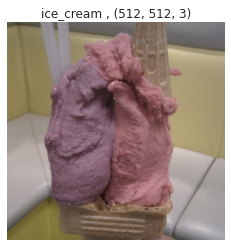

In [220]:
view_random_image(target_dir = train_dir,
                  target_class = random.choice(class_names));

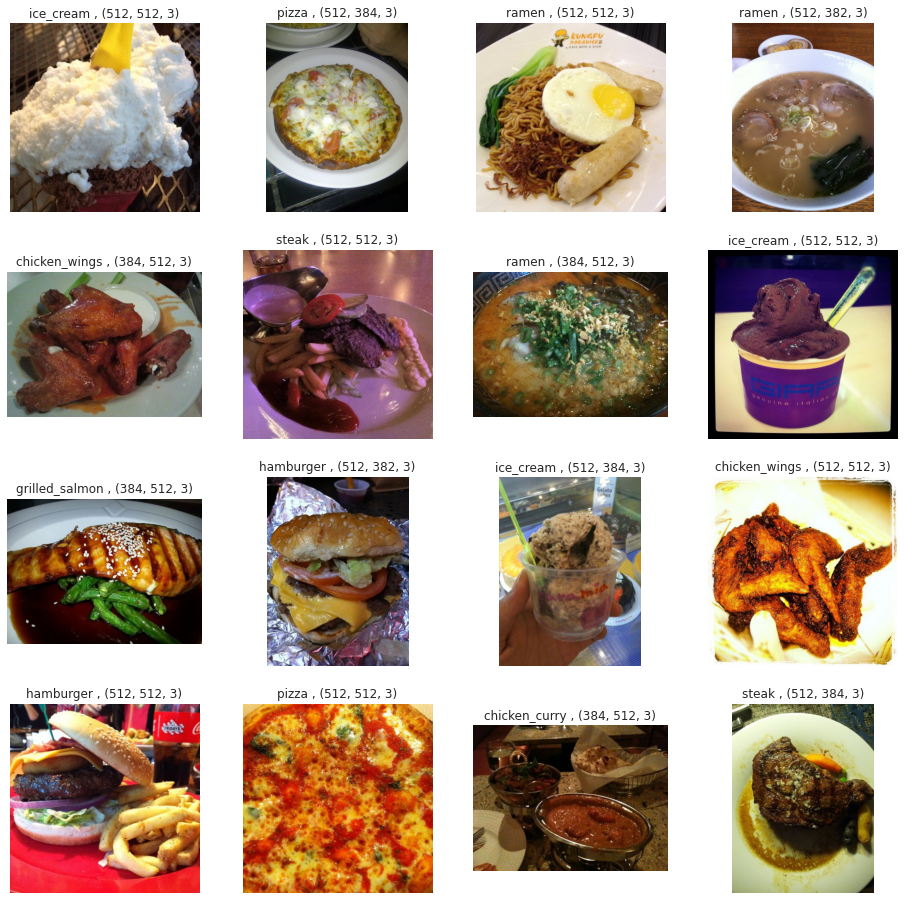

In [221]:
plt.figure(figsize = (16,16))

for i in range(16):
  plt.subplot(4,4,i+1)
  img = view_random_image(target_dir = train_dir,
                    target_class = random.choice(class_names));

### 5.2 Preprocessing Data
___
1. Define Rescale Function and file dir
2. Load and Preprocess images
3. Build a CNN model to find pattern in images 
4. Compile the CNN model
5. Fit the CNN model

In [222]:
# Step 1 : Define Datagen Params
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

# Step 2 : Load and preprocess images
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [223]:
#Step 3 : Create a Baseline Model : Ref : https://poloclub.github.io/cnn-explainer/
model_8 = Sequential([
                      Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu' , input_shape = (224,224,3)), # Input_layer 1_1
                      Conv2D(10,3,activation = 'relu'), # Layer 1_2
                      MaxPool2D(pool_size = 2),
                      Conv2D(10,3,activation = 'relu'), # Layer 2_1
                      Conv2D(10,3,activation = 'relu'), # Layer 2_2
                      MaxPool2D(2),
                      Flatten(),
                      Dense(10,activation = 'softmax') #Output is 10 for this multiclass example. Activation  = 'softmax'

])

# Step 4 : Compile the model
model_8.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = 'accuracy')

In [224]:
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.1824 - accuracy: 0.1837 - val_loss: 2.0182 - val_accuracy: 0.2752
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.9067 - accuracy: 0.3353 - val_loss: 1.9371 - val_accuracy: 0.3176
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.4846 - accuracy: 0.4992 - val_loss: 2.0632 - val_accuracy: 0.3072
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.7463 - accuracy: 0.7595 - val_loss: 2.7866 - val_accuracy: 0.2720
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.2298 - accuracy: 0.9319 - val_loss: 4.3004 - val_accuracy: 0.2564


### 5.3 Evaluating Training Curves
___

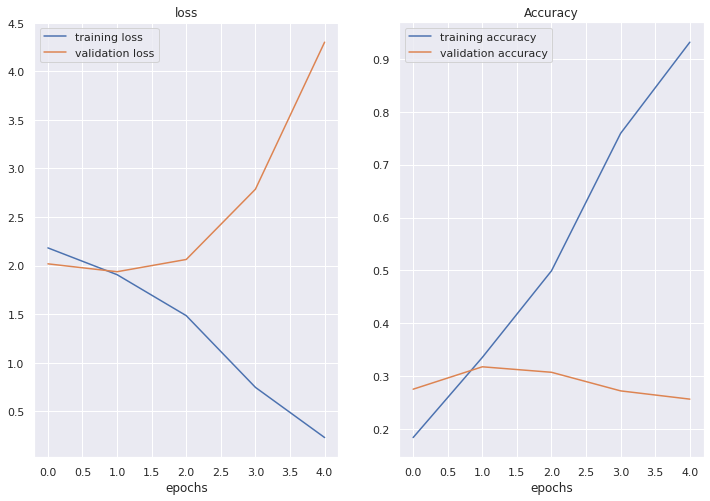

In [225]:
# Baseline Model obeserved to be much overfit
plot_loss(history_8)

### 5.4 Tuning Hyperparameter to reduce overfitting
___

1. Data Augmentation
2. Decrease no. of layers
3. Decrease hidden units

In [226]:
model_8.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 28090)           

In [227]:
model_9 = Sequential([
                      Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu' , input_shape = (224,224,3)),
                      MaxPool2D(2),
                      Conv2D(10,3,activation = 'relu'), 
                      MaxPool2D(2),
                      Flatten(),
                      Dense(10,activation = 'softmax')
])

model_9.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = 'accuracy')

In [228]:
history_9 = model_9.fit(train_data,
                        epochs = 5,
                        validation_data = test_data,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 178ms/step - loss: 2.3668 - accuracy: 0.2281 - val_loss: 1.9910 - val_accuracy: 0.2848
Epoch 2/5
235/235 [==============================] - 42s 177ms/step - loss: 1.8072 - accuracy: 0.3785 - val_loss: 1.9373 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 41s 176ms/step - loss: 1.5089 - accuracy: 0.4973 - val_loss: 1.9719 - val_accuracy: 0.3136
Epoch 4/5
235/235 [==============================] - 41s 176ms/step - loss: 1.1029 - accuracy: 0.6448 - val_loss: 2.2578 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 42s 178ms/step - loss: 0.7126 - accuracy: 0.7851 - val_loss: 2.7077 - val_accuracy: 0.2884


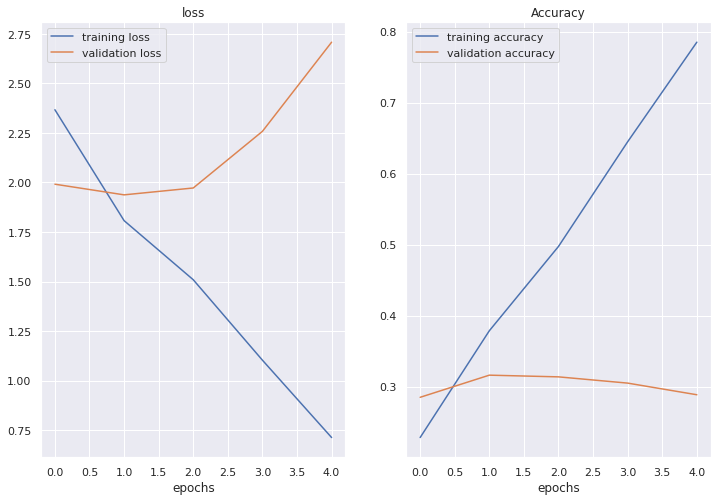

In [229]:
# Model 9 remained much overfitted and performed as bad as model 8.
# Validation Prediction starts to perform badly and losses is shooting up.
plot_loss(history_9)

### 5.5 Data Augmentation to reduce overfitting
___

In [230]:
# Step 1 : Define Rescale function and file dir
train_datagen_augmented = ImageDataGenerator(rotation_range=0.2,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,
                                            rescale = 1/255.)

In [231]:
# Step 2 : Load and preprocess images

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = 'categorical',
                                                                   batch_size = 32)

Found 7500 images belonging to 10 classes.


In [232]:
train_data_augmented

In [233]:
# Step 3 : Create the model
model_10  = Sequential([
                        Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu' , input_shape = (224,224,3)),
                        Conv2D(10 ,3 , activation = 'relu'),
                        MaxPool2D(2),
                        Conv2D(10,3,activation = 'relu'),
                        Conv2D(10,3,activation = 'relu'),
                        MaxPool2D(2),
                        Flatten(),
                        Dense(10 , activation = 'softmax')
                        
])

#Step 4 : Compile the model
model_10.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.CategoricalCrossentropy(),
                 metrics = 'accuracy')

In [234]:
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          validation_data = test_data,
                          steps_per_epoch = len(train_data_augmented),
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 466ms/step - loss: 2.2534 - accuracy: 0.1577 - val_loss: 2.0824 - val_accuracy: 0.2480
Epoch 2/5
235/235 [==============================] - 109s 463ms/step - loss: 2.1133 - accuracy: 0.2359 - val_loss: 1.9904 - val_accuracy: 0.3144
Epoch 3/5
235/235 [==============================] - 109s 464ms/step - loss: 2.0664 - accuracy: 0.2627 - val_loss: 1.9524 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0344 - accuracy: 0.2816 - val_loss: 1.9271 - val_accuracy: 0.3196
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0034 - accuracy: 0.2975 - val_loss: 1.9065 - val_accuracy: 0.3140


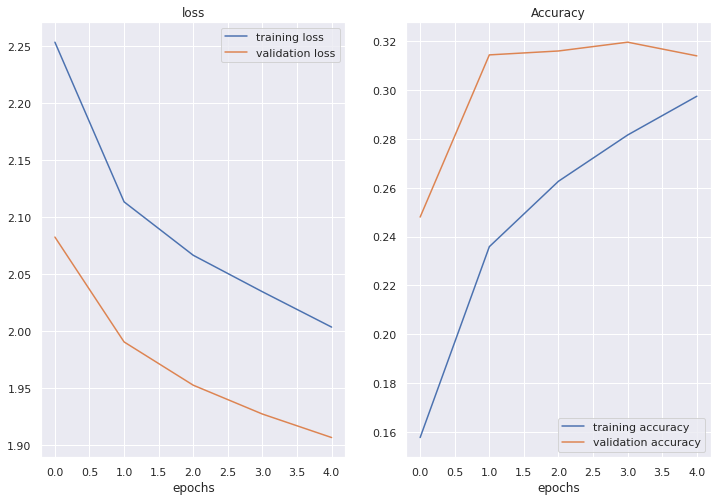

In [235]:
# Error is still high , however model is not overfitting in this instances.
# Model accuracy appears to be increasing and will further increase if we give more epochs.
plot_loss(history_10)

In [236]:
# Lets see accuracy with more epochs
model_11  = tf.keras.models.clone_model(model_10)

model_11.compile(optimizer = tf.keras.optimizers.Adam(),
                 loss = tf.keras.losses.CategoricalCrossentropy(),
                 metrics = 'accuracy')

history_11 = model_11.fit(train_data_augmented,
                          epochs = 10,
                          validation_data = test_data,
                          steps_per_epoch = len(train_data_augmented),
                          validation_steps = len(test_data))

Epoch 1/10
235/235 [==============================] - 109s 463ms/step - loss: 2.2610 - accuracy: 0.1559 - val_loss: 2.1014 - val_accuracy: 0.2352
Epoch 2/10
235/235 [==============================] - 108s 460ms/step - loss: 2.1237 - accuracy: 0.2324 - val_loss: 2.0423 - val_accuracy: 0.2804
Epoch 3/10
235/235 [==============================] - 108s 461ms/step - loss: 2.0823 - accuracy: 0.2532 - val_loss: 1.9183 - val_accuracy: 0.3308
Epoch 4/10
235/235 [==============================] - 110s 470ms/step - loss: 2.0156 - accuracy: 0.2863 - val_loss: 1.9067 - val_accuracy: 0.3376
Epoch 5/10
235/235 [==============================] - 111s 471ms/step - loss: 1.9684 - accuracy: 0.3099 - val_loss: 1.8309 - val_accuracy: 0.3596
Epoch 6/10
235/235 [==============================] - 110s 467ms/step - loss: 1.9165 - accuracy: 0.3287 - val_loss: 1.7603 - val_accuracy: 0.3792
Epoch 7/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9114 - accuracy: 0.3420 - val_loss: 1.7971 -

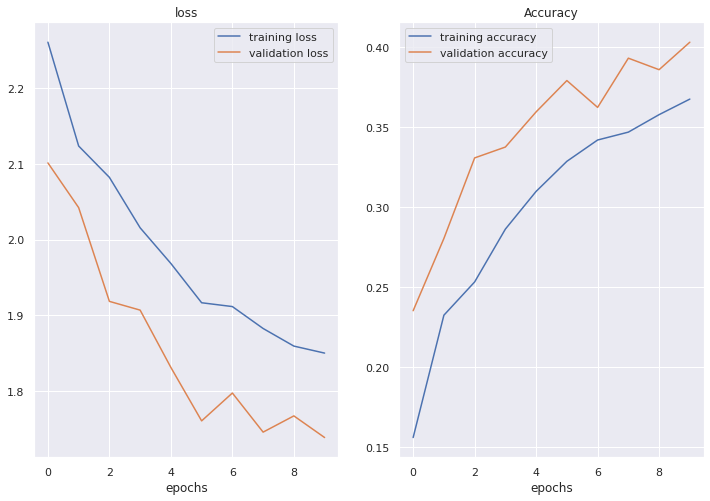

In [237]:
plot_loss(history_11)

### 5.6 Using our models for predictions
___

In [238]:
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-chicke-curry.jpg
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-tuna-sushi.jpg
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-tuna-sushi_1.jpg
!wget https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-steak.jpeg

--2021-08-22 15:02:39--  https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-chicke-curry.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866421 (846K) [image/jpeg]
Saving to: ‘03-chicke-curry.jpg.5’

03-chicke-curry.jpg 100%[===================>] 846.11K  --.-KB/s    in 0.05s   

2021-08-22 15:02:40 (18.2 MB/s) - ‘03-chicke-curry.jpg.5’ saved [866421/866421]

--2021-08-22 15:02:40--  https://raw.githubusercontent.com/86lekwenshiung/Neural-Network-with-Tensorflow/main/images/03-tuna-sushi.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

In [239]:
def pred_plot(model , filename , class_names = class_names):

  # Load in Image and Preprocess
  img = preprocess_image(filename)

  # Making a prediction
  pred = model.predict(tf.expand_dims(img , axis = 0))

  # Logic for multi-class
  if len(pred[0]) >1: 
    pred_label = class_names[tf.argmax(pred[0])]
  else:
  # Getting the prediction label
    pred_label = class_names[int(tf.round(pred[0]))]

  plt.imshow(img) # Need to remain ndim = 3 for plotting purpose --> refer to expand_dims
  plt.title(f'Prediction: {pred_label}')
  plt.axis(False)

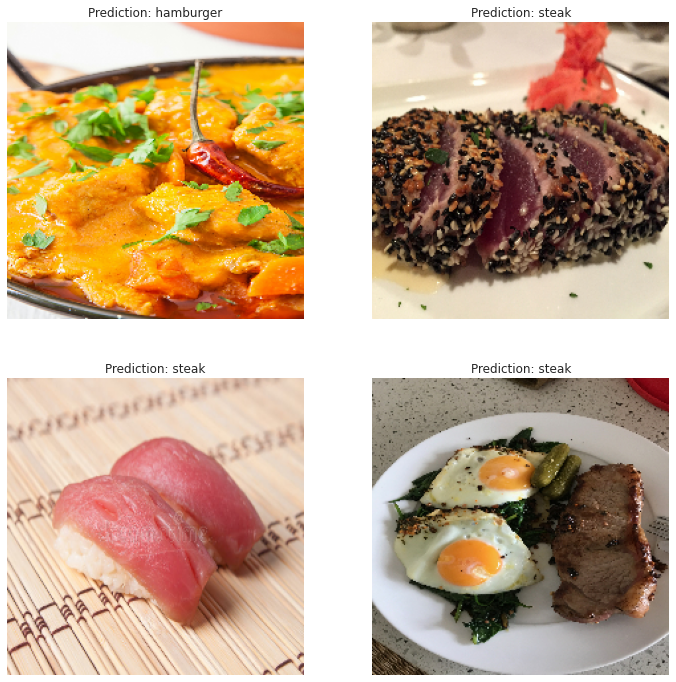

In [240]:
# The Mullti CLass Binary Model did not perform very well in the prediction.
# Prediction accuracy is ~40%, thereforen high error expected.
custom_image = ['03-chicke-curry.jpg' , '03-tuna-sushi_1.jpg' , '03-tuna-sushi.jpg' ,'03-steak.jpeg']

plt.figure(figsize = (12,12))
for index , image in enumerate(custom_image):
  plt.subplot(2,2,index +1)
  pred_plot(model = model_11,
            filename = image,
            class_names = class_names)

# 6.0 Saving and Loading the model
___

In [241]:
# Saving model
model_11.save('saved_trained_model_11')

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [242]:
# Loading Model
loaded_model_11 = tf.keras.models.load_model('saved_trained_model_11')
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 1.7383 - accuracy: 0.4032


[1.7382577657699585, 0.4032000005245209]

In [243]:
# Checking original model score
model_11.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.7383 - accuracy: 0.4032


[1.7382582426071167, 0.4032000005245209]